| Project #4 | "Bridging The Gap" - Learning to Practice |
| ----------- | ----------- |
| Class | MBC 638 - Data Analysis and Decision Making |
| Date | August 2022 |

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Arrivals (SOW Requests)
ra = 3 # SOWs per day
ta = 1 # Day between SOW arrival

# Processing (Building and completing SOWs)
rp = 2 # SOWs completed per day
tp = .33 # Time between completing a SOW and picking up a new SOW request and associated task

In [ ]:
"""
Create a function that simulates (mostly) any pre-sales task queueing scenario.

Indicator to measure and improve = "Average Cycle Time" (CT)

CT = tq + tp

tq: waiting time in the queue (represented as days)
tp: effective processing time (also represented as days)

CVa: is a deterministic distribution of arrivals
CVp: is a stochastic distribution or processing time

Assumptions:
The scenario assumes that SOWs or similar tasks are task completion by batch. 
SOWs or simialr tasks are requested in a continuous flow with a constant interval time. 
A constant flow of tasks may be realistic.
Focus process improvement in other areas such as windows to intake or view SOW requests. 
Use an SLA timer starting when the SOW state is moved from "Received -> In Progress". 
Processing time also as a function of requirements ascertained from the Client. 
Discovery calls increase time LOE in the short term but decrease LOE when developing a 
solution for a SOW, DEMO, etc.

"""

In [3]:
# Solution 1 (Single line with two (2) work stations)
def tq_s1(ra, ta, rp, tp, CVa, CVp):
    u = 1/2 * ra/rp # Divided by two (2) because the input flow is split between SEs that are qualified to perform the task
    tq = ((CVa**2+CVp**2)/2)*((math.pow(u, math.sqrt(6)-1)))/(2*(1-u))*tp # math returns the value x raised to power of y
    return tq # Scenario: two SEs working from one queue input stream (i.e, (1)SOW,(1)BE, (1)DEMO)

"""
The math.pow() method returns the value of x raised to power y.
If x is negative and y is not an integer, it returns a ValueError.
This method converts both arguments into a float.
Tip: If we use math.pow(1.0,x) or math.pow(x,0.0), it will always returns 1.0.

Syntax:
math.pow(x, y)

"""
# Solution 1a (Single line with three (3) SE workers)
def tq_s1a(ra, ta, rp, tp, CVa, CVp):
    u = 1/3 * ra/rp # Divided by three (3) because the input flow is split between SEs that are qualified to perform the task
    tq = ((CVa**2+CVp**2)/2)*((math.pow(u, math.sqrt(6)-1)))/(2*(1-u))*tp # math returns the value x raised to power of y
    return tq # Scenario: two SEs working from one queue input stream (i.e, (1)SOW,(1)BE, (1)DEMO)

# Solution 2 (Two (separate) lines with SE workers handling an individual queue (alone))

"""
The ideal solution would have 1-2 SE workers always working in a queue during business hours.
In other words, all queues should be active. 
Track anytime a queue is inactive during business hours.
Based on demand,scale up resources and / or shifts with Indian resources in a follow the sun model. 

"""

def tq_s2(ra, ta, rp, tp, CVa, CVp):
    u = 1/2 * ra/rp
    tq = ((CVa**2+CVp**2)/2)*((u)/(1-u))*tp
    return tq # Scenario: Two SEs working from their own one (1) queue input stream, working separately. 




In [4]:
# Deterministic distribution for arrival

"""
In a deterministic scenario (CVp = CVa = 0) because there is no queuing time is zero (0)
for both solutions. 

But we bring variability in with # and rate of arrivals, rate of processing and time between
starting new processing, quality issues, errors, etc..

"""

CVa = 0 # CVA = Deterministic distribution of arrivals
# Set the value as 0 to represent the initial starting point in time

# Create empty lists for results
x, y1, y2, y3 = [], [], [], []

# We want at least 30 data points for normal distribution
for p in np.linspace(0,3,3*10+1): # zero-based indexing in python, so +1 = 30 
    CVp = p
    x.append(CVp)
    
    # Calculate tq
    y1.append(tq_s1(ra,ta,rp,tp,CVa,CVp))
    y2.append(tq_s2(ra,ta,rp,tp,CVa,CVp))
    y3.append(tq_s1a(ra,ta,rp,tp,CVa,CVp))
    
# Output results in dataframe
# df_r = pd.DataFrame({'CVP': x, 'Solution one (1): Two SEs working from one (1) queue': y1,
#                      'Solution two (2): Two SEs working from their own queue': y2})

df_r = pd.DataFrame({'CVp': x, 'solution_1': y1, 'solution_2': y2, 'solution_1a': y3})
df_r['Δ(S2,S1)'] = df_r['solution_2'] - df_r['solution_1']
df_r['Δ(S2,S1a)'] = df_r['solution_2'] - df_r['solution_1a']

df_r # Outputs a stochastic distribution of processing time

,CVp,solution_1,solution_2,solution_1a,"Δ(S2,S1)","Δ(S2,S1a)"
0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.1,0.002175,0.00495,0.000604,0.002775,0.004346
2,0.2,0.008699,0.01980,0.002417,0.011101,0.017383
3,0.3,0.019573,0.04455,0.005437,0.024977,0.039113
4,0.4,0.034797,0.07920,0.009666,0.044403,0.069534
5,0.5,0.054370,0.12375,0.015104,0.069380,0.108646
6,0.6,0.078292,0.17820,0.021749,0.099908,0.156451
7,0.7,0.106565,0.24255,0.029603,0.135985,0.212947
8,0.8,0.139186,0.31680,0.038666,0.177614,0.278134
9,0.9,0.176158,0.40095,0.048936,0.224792,0.352014


In [5]:
# Send output to csv
df_r.to_csv('df_r_output.csv')

In [ ]:
"""
In a deterministic scenario (CVp = CVa = 0) because there is no queuing time is zero (0)
for both solutions. 

But we bring variability in with # and rate of arrivals, rate of processing and time between
starting new processing, quality issues, errors, etc..
"""

In [ ]:

"""
Stochastic
Definition:
The adjective “stochastic” implies the presence of a random variable; e.g. stochastic variation is 
variation in which at least one of the elements is a variate and a stochastic process is one wherein 
the system incorporates an element of randomness as opposed to a deterministic system.

https://stats.oecd.org/glossary/detail.asp?ID=3848
"""  
    

In [ ]:
plt.style.available # Available styles in dictionary

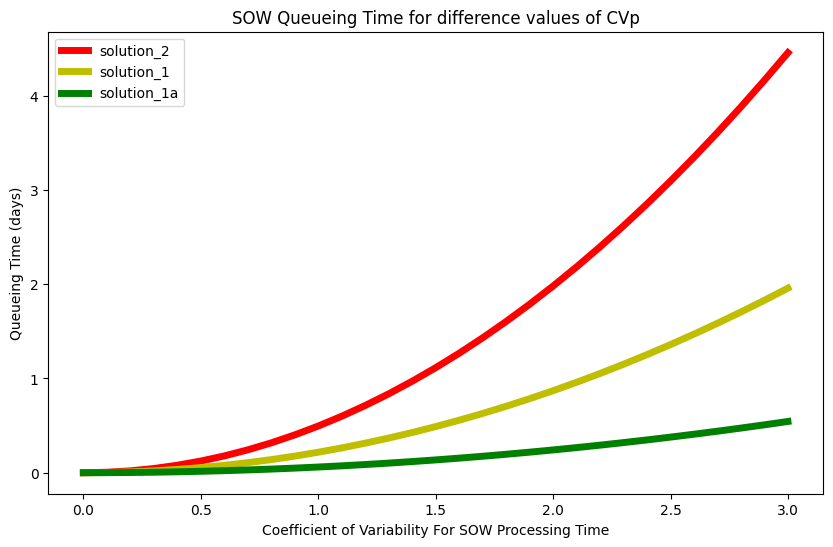

In [6]:
# Plot results
ax = plt.gca()
df_r.plot(figsize=(10,6), x="CVp", y="solution_2", ax = ax, color='r', linewidth=5, markersize=20)
df_r.plot(figsize=(10,6), x="CVp", y="solution_1", ax = ax, color='y', linewidth=5, markersize=20)
df_r.plot(figsize=(10,6), x="CVp", y="solution_1a", ax = ax, color='g', linewidth=5, markersize=20)
plt.xlabel('Coefficient of Variability For SOW Processing Time')
plt.ylabel('Queueing Time (days)')
plt.title('SOW Queueing Time for difference values of CVp')
plt.style.use('classic') # visual settings
plt.show()

| END OF PROGRAM |
| ----------- |